<a href="https://colab.research.google.com/github/evo4np/damp_preprocessing_2018/blob/master/station_8779.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
import os
import datetime
import IPython
import IPython.display
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import missingno as mno

import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.mlab as mlab


from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler




plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False



# Defining Functions

In [ ]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table



In [ ]:
def missing_values(df):
    for col in df.columns:
        pct_missing = np.mean(df[col].isnull())
        print('{} - {}%'.format(col, round(pct_missing*100)))
    
    for col in df.columns:
        missing = df[col].isnull()
        num_missing = np.sum(missing)

        if num_missing > 0:  
            print('{} and the total number of missing values is : {}'.format(col,num_missing))

In [52]:
def plot_df(df, x, y, dpi=100):
  plt.figure(figsize=(16,5), dpi=dpi)
  plt.plot(x,y, color="tab:red")
  plt.gca()
  plt.show()

def scatter_df(df,x,y,dpi=100):
  plt.figure(figsize=(16,5),dpi=dpi)
  plt.scatter(x,y)
  plt.gca()
  plt.show()

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVR

# X = evaluation1_station.drop('Slut', axis=1)
# y = evaluation1_station['Slut']

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state =0)

# model = SVR(kernel='linear', C=1.0)
# model.fit(X_train, y_train)

In [6]:
#read the data
df_8779 = 'https://raw.githubusercontent.com/evo4np/damp_preprocessing_2018/master/station_8779/8779_merged.csv'
df_8779 = pd.read_csv(df_8779)
df_8779.head()

,Start,Slut,CO (185),NO2 (183),NOX as NO2 (184),PM10 (182),PM2.5 (181),Air Temperature,Air Pressure,Relative Humidity,Precepitation
0,2014-01-01 00:00:00,2014-01-01 01:00,0.41,27.7,58.4,69.8,45.7,2.9,1015.7,92.0,0.0
1,2014-01-01 01:00:00,2014-01-01 02:00,0.27,40.4,72.5,23.9,16.3,2.8,1015.9,93.0,0.0
2,2014-01-01 02:00:00,2014-01-01 03:00,0.35,28.1,49.8,13.9,6.6,3.2,1015.4,94.0,0.0
3,2014-01-01 03:00:00,2014-01-01 04:00,0.24,16.9,28.9,16.8,8.5,3.6,1015.2,93.0,0.0
4,2014-01-01 04:00:00,2014-01-01 05:00,0.28,21.1,32.5,16.7,6.6,3.0,1014.8,92.0,0.0


**Before diving in to build a model it's important to understand your data, and be sure that you're passing the model appropriately formatted data.**

In [7]:
# shape and type of data
# print(df.shape)
print(df_8779.dtypes)

Start                 object
Slut                  object
CO (185)             float64
NO2 (183)            float64
NOX as NO2 (184)     float64
PM10 (182)           float64
PM2.5 (181)          float64
Air Temperature      float64
Air Pressure         float64
Relative Humidity    float64
Precepitation        float64
dtype: object


**heatmap for the data**

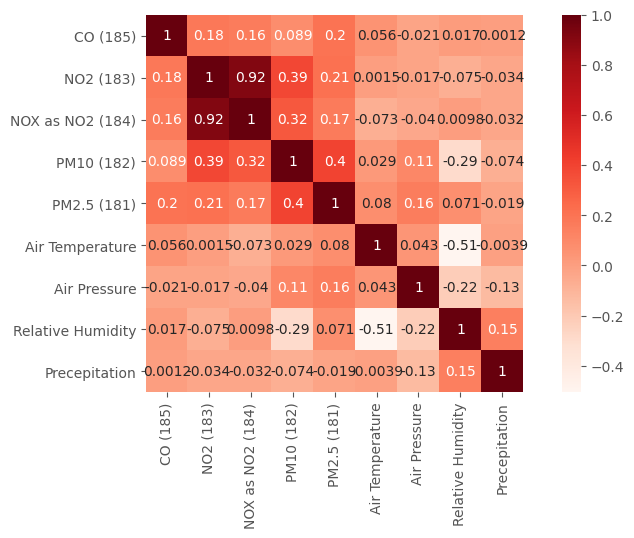

In [8]:
cor = df_8779.corr()
plt.figure(figsize=(10,5), dpi=100)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, square=True)
plt.show()

**Visualizing the dataset**

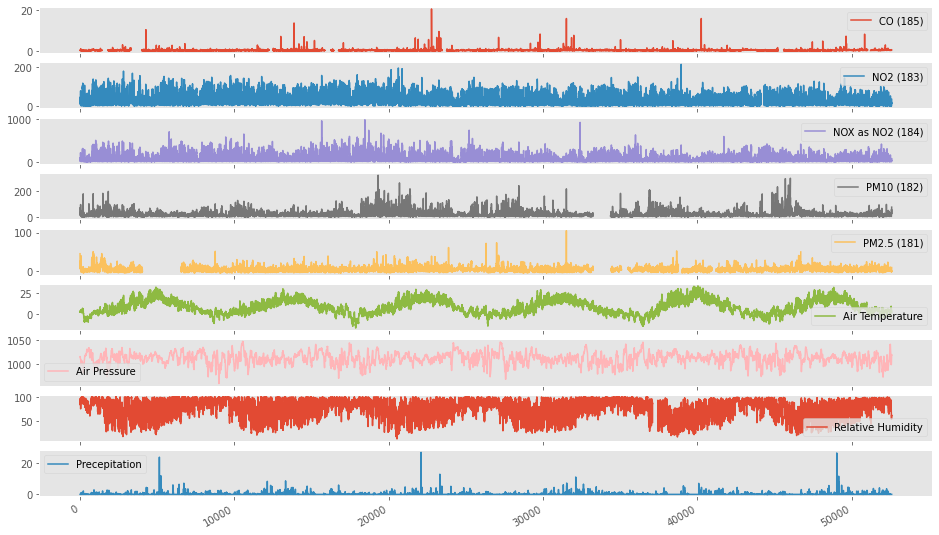

In [9]:
df_8779.plot(subplots= True, figsize=(16,10));

In [10]:
missing_zero_values_table(df_8779)

Your selected dataframe has 11 columns and 52584 Rows.
There are 9 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
PM2.5 (181),236,6732,12.8,6968,13.3,float64
CO (185),0,3552,6.8,3552,6.8,float64
PM10 (182),22,2156,4.1,2178,4.1,float64
NO2 (183),0,841,1.6,841,1.6,float64
NOX as NO2 (184),0,645,1.2,645,1.2,float64
Relative Humidity,0,375,0.7,375,0.7,float64
Precepitation,47223,186,0.4,47409,90.2,float64
Air Pressure,0,27,0.1,27,0.1,float64
Air Temperature,247,23,0.0,270,0.5,float64


**Missing Values Plot**

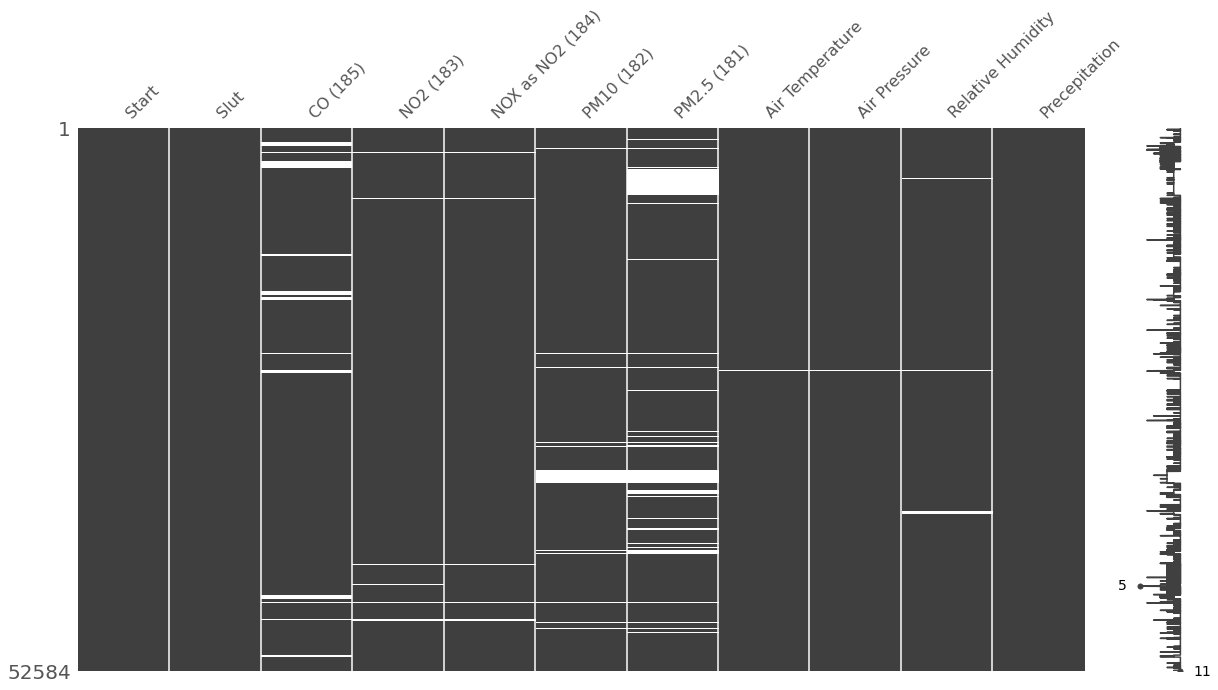

In [12]:
mno.matrix(df_8779, figsize = (20,10))

In [11]:
missing_values(df_8779)

Start - 0.0%
Slut - 0.0%
CO (185) - 7.0%
NO2 (183) - 2.0%
NOX as NO2 (184) - 1.0%
PM10 (182) - 4.0%
PM2.5 (181) - 13.0%
Air Temperature - 0.0%
Air Pressure - 0.0%
Relative Humidity - 1.0%
Precepitation - 0.0%
CO (185) and the total number of missing values is : 3552
NO2 (183) and the total number of missing values is : 841
NOX as NO2 (184) and the total number of missing values is : 645
PM10 (182) and the total number of missing values is : 2156
PM2.5 (181) and the total number of missing values is : 6732
Air Temperature and the total number of missing values is : 23
Air Pressure and the total number of missing values is : 27
Relative Humidity and the total number of missing values is : 375
Precepitation and the total number of missing values is : 186


In [23]:
df_8779.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CO (185),49032.0,0.335007,0.388743,0.04,0.23,0.3,0.38,20.7
NO2 (183),51743.0,33.604750,23.285529,0.40,15.80,28.0,46.20,212.8
NOX as NO2 (184),51939.0,66.411269,65.941538,0.10,22.10,44.5,87.90,982.5
PM10 (182),50428.0,19.759548,18.367639,-3.00,9.10,14.6,23.70,324.5
PM2.5 (181),45852.0,5.688373,5.272743,-3.00,2.40,4.7,7.70,105.0
Air Temperature,52561.0,8.438698,7.829768,-15.90,2.30,7.6,14.50,32.7
Air Pressure,52557.0,1012.356744,11.590300,960.80,1005.40,1012.8,1019.80,1046.7
Relative Humidity,52209.0,75.955123,18.291926,12.00,64.00,80.0,91.00,100.0
Precepitation,52398.0,0.065422,0.406504,0.00,0.00,0.0,0.00,27.1


# Outlier Detection


**Standard Deviation Method**

In [13]:
std_deviation = df_8779.copy()

In [19]:
def out_std(df, column):
    global lower,upper
    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = df[column].mean(), df[column].std()
    # calculate the cutoff value
    cut_off = data_std * 3
    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    print(df1.shape,df2.shape)
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [20]:
out_std (std_deviation, 'PM10 (182)')

The lower bound value is -35.34336917274576
The upper bound value is 74.86246570641757
(1128, 11) (0, 11)
Total number of outliers are 1128


In [26]:
len(std_deviation[std_deviation['PM10 (182)'] < 74.86246570641757].index.values )

49300

In [27]:
len(std_deviation[std_deviation['PM10 (182)'] > -35.34336917274576].index.values )

50428

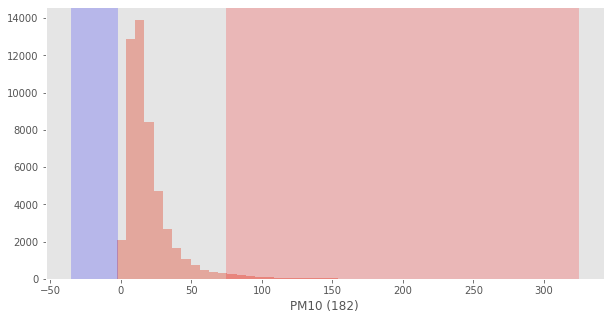

In [31]:
plt.figure(figsize = (10,5))
sns.distplot(std_deviation['PM10 (182)'], kde=False)
plt.axvspan(xmin = lower,xmax= std_deviation['PM10 (182)'].min(),alpha=0.2, color='blue')
plt.axvspan(xmin = upper,xmax= std_deviation['PM10 (182)'].max(),alpha=0.2, color='red')

In [34]:
df_std_deviation_outlier_free = std_deviation[(std_deviation['PM10 (182)'] < upper) & (std_deviation['PM10 (182)'] > lower)]

In [35]:
df_std_deviation_outlier_free.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49300 entries, 0 to 52582
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Start              49300 non-null  object 
 1   Slut               49300 non-null  object 
 2   CO (185)           45921 non-null  float64
 3   NO2 (183)          48556 non-null  float64
 4   NOX as NO2 (184)   48733 non-null  float64
 5   PM10 (182)         49300 non-null  float64
 6   PM2.5 (181)        44648 non-null  float64
 7   Air Temperature    49277 non-null  float64
 8   Air Pressure       49273 non-null  float64
 9   Relative Humidity  48954 non-null  float64
 10  Precepitation      49132 non-null  float64
dtypes: float64(9), object(2)
memory usage: 4.5+ MB


In [37]:
df_std_deviation_outlier_free.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CO (185),45921.0,0.333389,0.389430,0.04,0.23,0.3,0.380,20.7
NO2 (183),48556.0,32.843338,22.764310,0.40,15.50,27.4,44.925,212.8
NOX as NO2 (184),48733.0,64.314867,64.445846,0.10,21.60,43.2,84.000,982.5
PM10 (182),49300.0,17.896469,13.085011,-3.00,8.90,14.3,22.800,74.8
PM2.5 (181),44648.0,5.596687,5.118669,-3.00,2.30,4.7,7.600,61.6
Air Temperature,49277.0,8.557175,7.884054,-15.90,2.30,7.9,14.600,32.7
Air Pressure,49273.0,1012.438603,11.560248,960.80,1005.50,1013.0,1019.900,1046.7
Relative Humidity,48954.0,76.137639,18.267845,12.00,64.00,81.0,91.000,100.0
Precepitation,49132.0,0.065635,0.410193,0.00,0.00,0.0,0.000,27.1


**Technique #2 Descriptive Statictics**

> the outliers could be too distinct that the box plot can’t visualize them. Instead, we can look at their descriptive statistics.


> For example, for the feature PM10 (182), we can see that the maximum value is 324, while the 75% quartile is only 23.70. The 324.50 value is an outlier.





In [21]:
df_8779['PM10 (182)'].describe()

count    50428.000000
mean        19.759548
std         18.367639
min         -3.000000
25%          9.100000
50%         14.600000
75%         23.700000
max        324.500000
Name: PM10 (182), dtype: float64

In [41]:
df_std_deviation_outlier_free['PM10 (182)'].describe()

count    49300.000000
mean        17.896469
std         13.085011
min         -3.000000
25%          8.900000
50%         14.300000
75%         22.800000
max         74.800000
Name: PM10 (182), dtype: float64

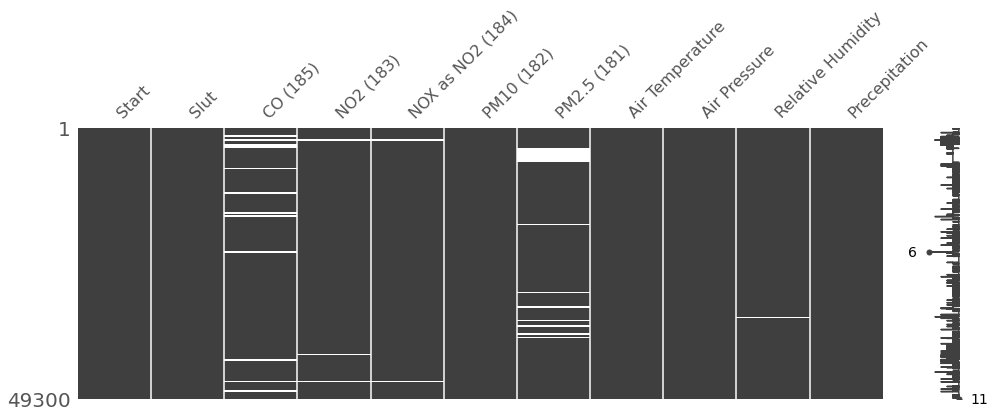

In [42]:
mno.matrix(df_std_deviation_outlier_free, figsize=(16,5))

Apply at least two more imputation techniques
remove negative values
outlier detection
lstm models

**Missing data**

In [44]:
df_8779.columns

Index(['Start', 'Slut', 'CO (185)', 'NO2 (183)', 'NOX as NO2 (184)',
       'PM10 (182)', 'PM2.5 (181)', 'Air Temperature', 'Air Pressure',
       'Relative Humidity', 'Precepitation'],
      dtype='object')

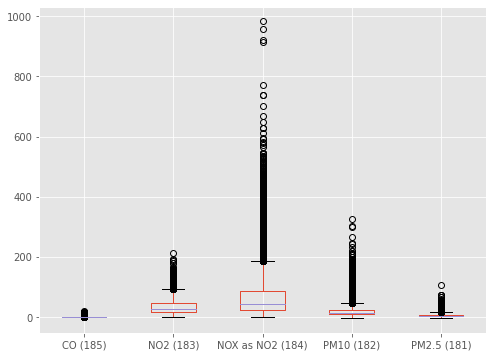

In [45]:
#2.Box Plot
df_8779.boxplot(column=['CO (185)', 'NO2 (183)', 'NOX as NO2 (184)',
       'PM10 (182)', 'PM2.5 (181)'])

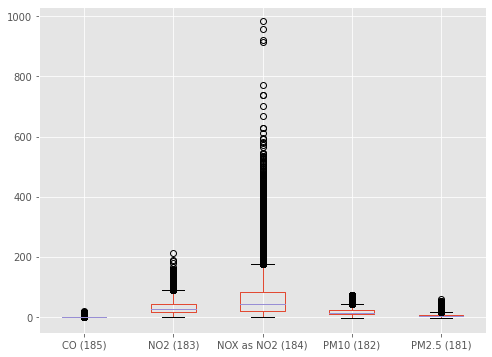

In [47]:
df_std_deviation_outlier_free.boxplot(column=['CO (185)', 'NO2 (183)', 'NOX as NO2 (184)',
       'PM10 (182)', 'PM2.5 (181)'])

# Imputation Techniques(Multivariate)

In [50]:
imp = IterativeImputer(max_iter=10, random_state=0)
features = df_std_deviation_outlier_free[['CO (185)', 'NO2 (183)', 'NOX as NO2 (184)',
       'PM10 (182)', 'PM2.5 (181)', 'Air Temperature', 'Air Pressure',
       'Relative Humidity', 'Precepitation']]
df1 = pd.DataFrame(imp.fit_transform(features))
df_std_deviation_outlier_free[['CO (185)', 'NO2 (183)', 'NOX as NO2 (184)',
       'PM10 (182)', 'PM2.5 (181)', 'Air Temperature', 'Air Pressure',
       'Relative Humidity', 'Precepitation']] = df1.copy()
missing_values(df_std_deviation_outlier_free)

Start - 0.0%
Slut - 0.0%
CO (185) - 7.0%
NO2 (183) - 7.0%
NOX as NO2 (184) - 7.0%
PM10 (182) - 7.0%
PM2.5 (181) - 7.0%
Air Temperature - 7.0%
Air Pressure - 7.0%
Relative Humidity - 7.0%
Precepitation - 7.0%
CO (185) and the total number of missing values is : 3269
NO2 (183) and the total number of missing values is : 3269
NOX as NO2 (184) and the total number of missing values is : 3269
PM10 (182) and the total number of missing values is : 3269
PM2.5 (181) and the total number of missing values is : 3269
Air Temperature and the total number of missing values is : 3269
Air Pressure and the total number of missing values is : 3269
Relative Humidity and the total number of missing values is : 3269
Precepitation and the total number of missing values is : 3269


After done with missing data and outliers. It is better to look at the unnecessary data.

If the data doesn't serve the purpose of the project then it's better to remove the data. 

We cover three main types of unnecessary data:


> 1. Uninformative/Repetitive
> 2. Irrelevant
> 3. Duplicates











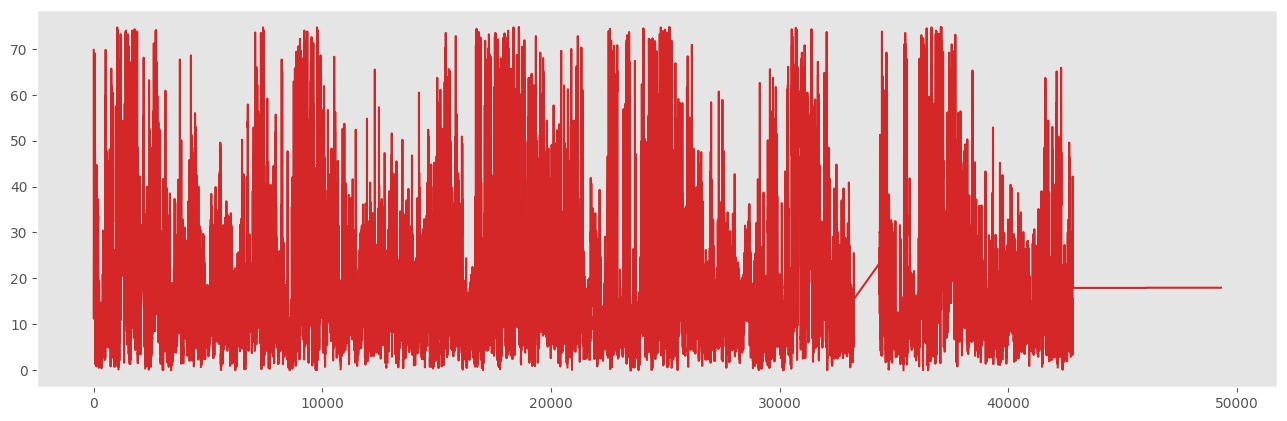

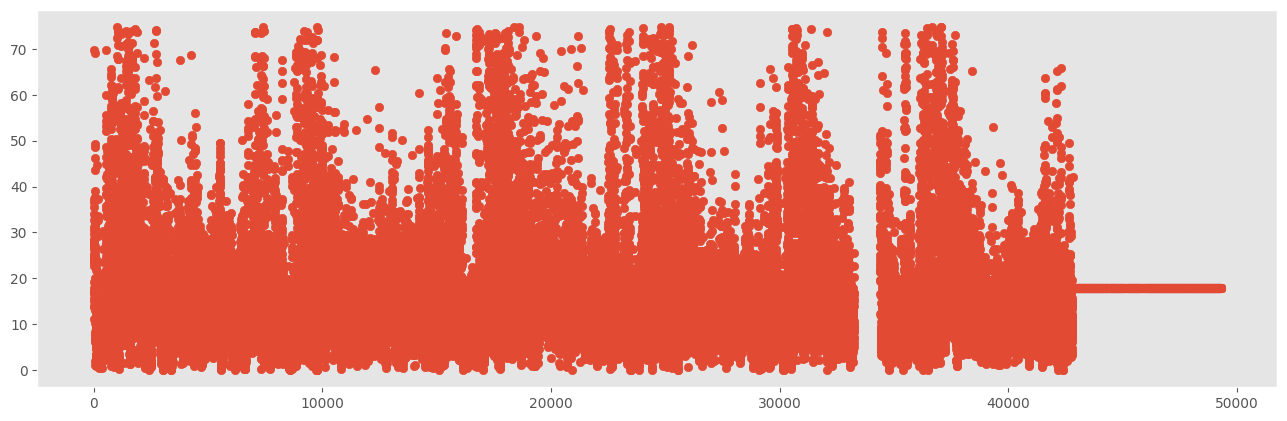

In [167]:
plot_df(df_std_deviation_outlier_free,df_std_deviation_outlier_free.index,df_std_deviation_outlier_free['PM10 (182)'])
scatter_df(df_std_deviation_outlier_free,df_std_deviation_outlier_free.index,df_std_deviation_outlier_free['PM10 (182)'])

In [168]:
df_std_deviation_outlier_free.head()

,Start,Slut,CO (185),NO2 (183),NOX as NO2 (184),PM10 (182),PM2.5 (181),Air Temperature,Air Pressure,Relative Humidity,Precepitation
0,2014-01-01 00:00:00,2014-01-01 01:00,0.41,27.7,58.4,69.8,45.7,2.9,1015.7,92.0,0.0
1,2014-01-01 01:00:00,2014-01-01 02:00,0.27,40.4,72.5,23.9,16.3,2.8,1015.9,93.0,0.0
2,2014-01-01 02:00:00,2014-01-01 03:00,0.35,28.1,49.8,13.9,6.6,3.2,1015.4,94.0,0.0
3,2014-01-01 03:00:00,2014-01-01 04:00,0.24,16.9,28.9,16.8,8.5,3.6,1015.2,93.0,0.0
4,2014-01-01 04:00:00,2014-01-01 05:00,0.28,21.1,32.5,16.7,6.6,3.0,1014.8,92.0,0.0


In [169]:
df_std_deviation_outlier_free.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CO (185),46031.0,0.337520,0.372492,0.040000,0.24,0.310000,0.37,20.7
NO2 (183),46031.0,33.478071,21.338793,0.600000,17.90,32.500000,42.20,168.0
NOX as NO2 (184),46031.0,66.226425,61.286504,0.800000,25.70,54.700000,77.00,982.5
PM10 (182),45895.0,17.953830,12.132097,0.000000,9.80,16.500000,21.10,74.8
PM2.5 (181),43427.0,6.034612,4.472537,0.000000,3.30,5.580868,7.30,61.6
Air Temperature,46031.0,8.519308,7.206431,-15.900000,3.00,8.560972,13.60,32.7
Air Pressure,46031.0,1012.356754,10.828310,960.800000,1006.80,1012.457008,1018.70,1046.7
Relative Humidity,46031.0,76.760633,16.638554,12.000000,68.00,77.000000,90.00,100.0
Precepitation,46031.0,0.066867,0.394202,-0.102098,0.00,0.000000,0.00,27.1


**Converting Negative values to NaN**

In [170]:
pm10 = df_std_deviation_outlier_free['PM10 (182)']
pm10 = pm10.apply(lambda x:np.nan if x<0 else x)

pm2_5 = df_std_deviation_outlier_free['PM2.5 (181)']
pm2_5 = pm2_5.apply(lambda x:np.nan if x<0 else x)


In [171]:
pm10.isnull().sum()

3405

In [172]:
df_std_deviation_outlier_free['PM10 (182)']=pm10
df_std_deviation_outlier_free['PM2.5 (181)']=pm2_5

In [173]:
df_std_deviation_outlier_free.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CO (185),46031.0,0.337520,0.372492,0.040000,0.24,0.310000,0.37,20.7
NO2 (183),46031.0,33.478071,21.338793,0.600000,17.90,32.500000,42.20,168.0
NOX as NO2 (184),46031.0,66.226425,61.286504,0.800000,25.70,54.700000,77.00,982.5
PM10 (182),45895.0,17.953830,12.132097,0.000000,9.80,16.500000,21.10,74.8
PM2.5 (181),43427.0,6.034612,4.472537,0.000000,3.30,5.580868,7.30,61.6
Air Temperature,46031.0,8.519308,7.206431,-15.900000,3.00,8.560972,13.60,32.7
Air Pressure,46031.0,1012.356754,10.828310,960.800000,1006.80,1012.457008,1018.70,1046.7
Relative Humidity,46031.0,76.760633,16.638554,12.000000,68.00,77.000000,90.00,100.0
Precepitation,46031.0,0.066867,0.394202,-0.102098,0.00,0.000000,0.00,27.1


**KNN IMputation**

In [174]:
df_std_deviation_outlier_free.columns

Index(['Start', 'Slut', 'CO (185)', 'NO2 (183)', 'NOX as NO2 (184)',
       'PM10 (182)', 'PM2.5 (181)', 'Air Temperature', 'Air Pressure',
       'Relative Humidity', 'Precepitation'],
      dtype='object')

In [175]:
imp = KNNImputer(n_neighbors=60, weights='distance')
features = df_std_deviation_outlier_free[['CO (185)', 'NO2 (183)', 'NOX as NO2 (184)',
       'PM10 (182)', 'PM2.5 (181)', 'Air Temperature', 'Air Pressure',
       'Relative Humidity', 'Precepitation']]
df_knn = pd.DataFrame(imp.fit_transform(features))


In [176]:
df_knn.head()

,0,1,2,3,4,5,6,7,8
0,0.41,27.7,58.4,69.8,45.7,2.9,1015.7,92.0,0.0
1,0.27,40.4,72.5,23.9,16.3,2.8,1015.9,93.0,0.0
2,0.35,28.1,49.8,13.9,6.6,3.2,1015.4,94.0,0.0
3,0.24,16.9,28.9,16.8,8.5,3.6,1015.2,93.0,0.0
4,0.28,21.1,32.5,16.7,6.6,3.0,1014.8,92.0,0.0


In [177]:
df_knn[['CO (185)', 'NO2 (183)', 'NOX as NO2 (184)',
       'PM10 (182)', 'PM2.5 (181)', 'Air Temperature', 'Air Pressure',
       'Relative Humidity', 'Precepitation']] = df_knn.copy()
missing_values(df_knn)

0 - 0.0%
1 - 0.0%
2 - 0.0%
3 - 0.0%
4 - 0.0%
5 - 0.0%
6 - 0.0%
7 - 0.0%
8 - 0.0%
CO (185) - 0.0%
NO2 (183) - 0.0%
NOX as NO2 (184) - 0.0%
PM10 (182) - 0.0%
PM2.5 (181) - 0.0%
Air Temperature - 0.0%
Air Pressure - 0.0%
Relative Humidity - 0.0%
Precepitation - 0.0%


In [178]:
df_knn.head()

,0,1,2,3,4,5,6,7,8,CO (185),NO2 (183),NOX as NO2 (184),PM10 (182),PM2.5 (181),Air Temperature,Air Pressure,Relative Humidity,Precepitation
0,0.41,27.7,58.4,69.8,45.7,2.9,1015.7,92.0,0.0,0.41,27.7,58.4,69.8,45.7,2.9,1015.7,92.0,0.0
1,0.27,40.4,72.5,23.9,16.3,2.8,1015.9,93.0,0.0,0.27,40.4,72.5,23.9,16.3,2.8,1015.9,93.0,0.0
2,0.35,28.1,49.8,13.9,6.6,3.2,1015.4,94.0,0.0,0.35,28.1,49.8,13.9,6.6,3.2,1015.4,94.0,0.0
3,0.24,16.9,28.9,16.8,8.5,3.6,1015.2,93.0,0.0,0.24,16.9,28.9,16.8,8.5,3.6,1015.2,93.0,0.0
4,0.28,21.1,32.5,16.7,6.6,3.0,1014.8,92.0,0.0,0.28,21.1,32.5,16.7,6.6,3.0,1014.8,92.0,0.0


In [179]:
df_knn=df_knn.drop([0,1,2,3,4,5,6,7,8], axis=1)
df_knn.head()

,CO (185),NO2 (183),NOX as NO2 (184),PM10 (182),PM2.5 (181),Air Temperature,Air Pressure,Relative Humidity,Precepitation
0,0.41,27.7,58.4,69.8,45.7,2.9,1015.7,92.0,0.0
1,0.27,40.4,72.5,23.9,16.3,2.8,1015.9,93.0,0.0
2,0.35,28.1,49.8,13.9,6.6,3.2,1015.4,94.0,0.0
3,0.24,16.9,28.9,16.8,8.5,3.6,1015.2,93.0,0.0
4,0.28,21.1,32.5,16.7,6.6,3.0,1014.8,92.0,0.0


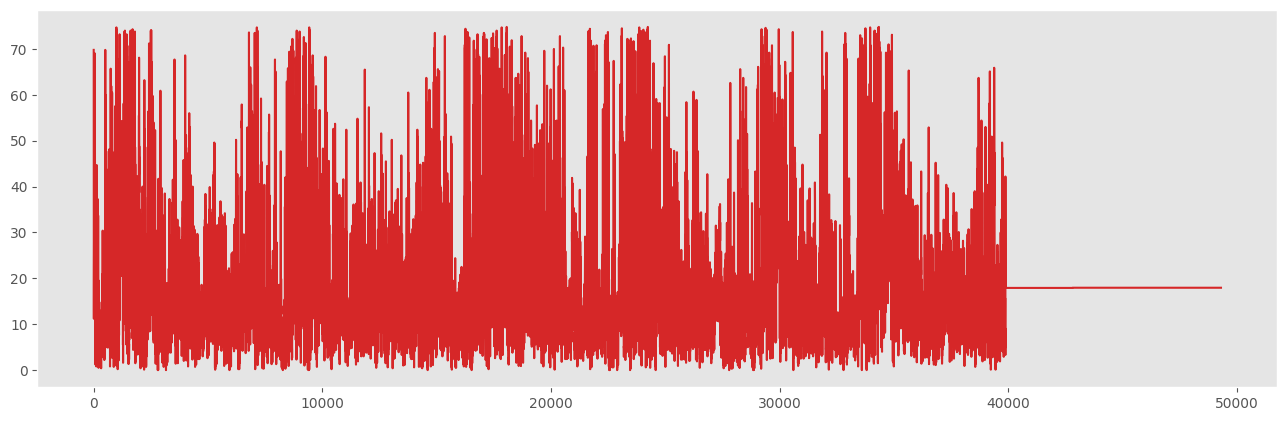

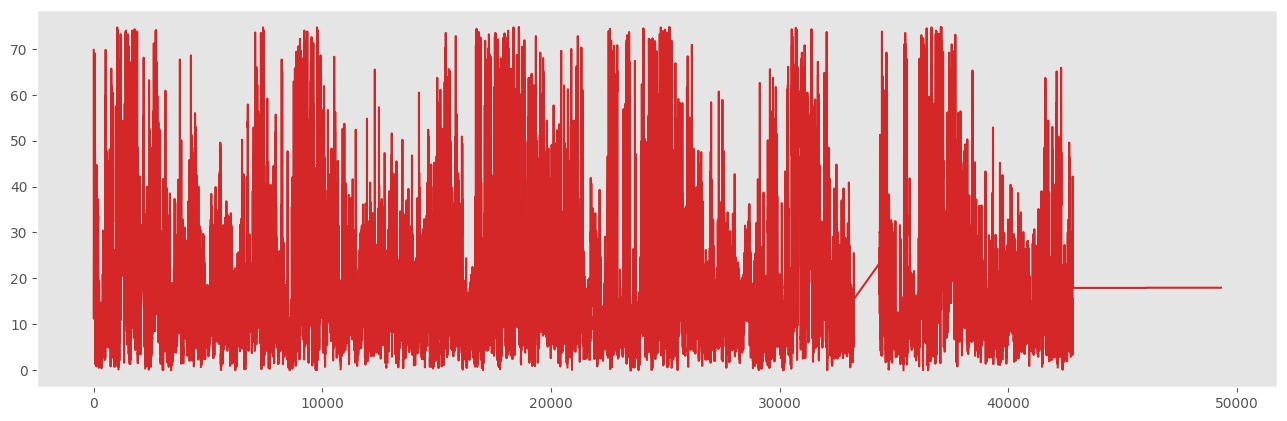

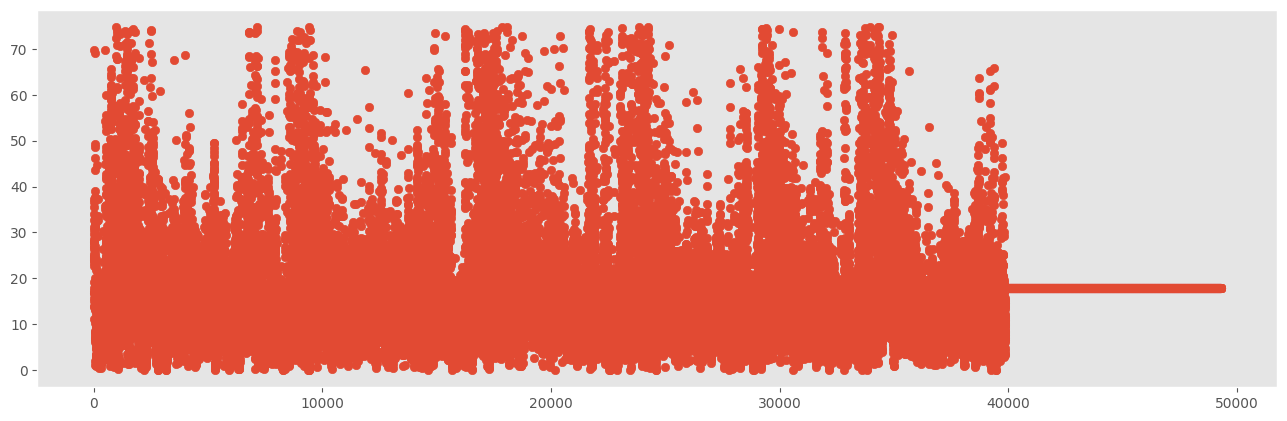

In [180]:
plot_df(df_knn,df_knn.index,df_knn['PM10 (182)'])
plot_df(df_std_deviation_outlier_free,df_std_deviation_outlier_free.index,df_std_deviation_outlier_free['PM10 (182)'])
scatter_df(df_knn,df_knn.index,df_knn['PM10 (182)'])

In [165]:
df_std_deviation_outlier_free.columns

Index(['Start', 'Slut', 'CO (185)', 'NO2 (183)', 'NOX as NO2 (184)',
       'PM10 (182)', 'PM2.5 (181)', 'Air Temperature', 'Air Pressure',
       'Relative Humidity', 'Precepitation'],
      dtype='object')

In [166]:
# df_new = df_std_deviation_outlier_free.drop(['CO (185)','NO2 (183)', 'NOX as NO2 (184)',
#        'PM10 (182)', 'PM2.5 (181)', 'Air Temperature', 'Air Pressure',
#        'Relative Humidity', 'Precepitation'],axis=1)
# df_new.head()

,Start,Slut
0,2014-01-01 00:00:00,2014-01-01 01:00
1,2014-01-01 01:00:00,2014-01-01 02:00
2,2014-01-01 02:00:00,2014-01-01 03:00
3,2014-01-01 03:00:00,2014-01-01 04:00
4,2014-01-01 04:00:00,2014-01-01 05:00


In [181]:
df_knn.head()

,CO (185),NO2 (183),NOX as NO2 (184),PM10 (182),PM2.5 (181),Air Temperature,Air Pressure,Relative Humidity,Precepitation
0,0.41,27.7,58.4,69.8,45.7,2.9,1015.7,92.0,0.0
1,0.27,40.4,72.5,23.9,16.3,2.8,1015.9,93.0,0.0
2,0.35,28.1,49.8,13.9,6.6,3.2,1015.4,94.0,0.0
3,0.24,16.9,28.9,16.8,8.5,3.6,1015.2,93.0,0.0
4,0.28,21.1,32.5,16.7,6.6,3.0,1014.8,92.0,0.0


,Start,Slut,CO (185),NO2 (183),NOX as NO2 (184),PM10 (182),PM2.5 (181),Air Temperature,Air Pressure,Relative Humidity,Precepitation
0,2014-01-01 00:00:00,2014-01-01 01:00,0.41,27.7,58.4,69.8,45.7,2.9,1015.7,92.0,0.0
1,2014-01-01 01:00:00,2014-01-01 02:00,0.27,40.4,72.5,23.9,16.3,2.8,1015.9,93.0,0.0
2,2014-01-01 02:00:00,2014-01-01 03:00,0.35,28.1,49.8,13.9,6.6,3.2,1015.4,94.0,0.0
3,2014-01-01 03:00:00,2014-01-01 04:00,0.24,16.9,28.9,16.8,8.5,3.6,1015.2,93.0,0.0
4,2014-01-01 04:00:00,2014-01-01 05:00,0.28,21.1,32.5,16.7,6.6,3.0,1014.8,92.0,0.0


In [113]:
# temp_df = df_std_deviation_outlier_free_knn.copy()
# temp_df = temp_df.set_index('Start')
# temp_df['Day of Year'] = temp_df.index.dayofyear
# temp_df['Day of Month'] = temp_df.index.day
# temp_df['Weekdays'] = temp_df.index.weekday
# temp_df['Weekday Name'] = temp_df.index.day_name()
# temp_df['Week of Year'] = temp_df.index.weekofyear
# temp_df['Hours'] = temp_df.index.hour
# temp_df.index = np.arange(0, len(temp_df))
# # pd.concat([outliers_free_df,pd.get_dummies(temp_df['Day of Year'], prefix='DayofYear')], axis=0)

# # outliers_free_df['Day of Year'] = temp_df['Day of Year']
# # outliers_free_df['Day of Month'] = temp_df['Day of Month']
# df_std_deviation_outlier_free_knn['Weekdays'] = temp_df['Weekdays']
# df_std_deviation_outlier_free_knn['Week Number'] = temp_df['Week of Year']
# df_std_deviation_outlier_free_knn['Hours'] = temp_df['Hours']

# df_std_deviation_outlier_free_knn.head()
# # temp_df.head()

In [144]:
training_set_length = len(df_std_deviation_outlier_free_knn)
training_set = df_std_deviation_outlier_free_knn.iloc[:int(training_set_length*0.7)].drop(columns=['Start', 'Slut']).copy()
validation_set = df_std_deviation_outlier_free_knn.iloc[int(training_set_length*0.7):int(training_set_length*0.9)].drop(columns=['Start', 'Slut']).copy()
testing_set = df_std_deviation_outlier_free_knn.iloc[int(training_set_length*0.9):].drop(columns=['Start', 'Slut']).copy()
# training_set = training_set.astype(object)
# validation_set = validation_set.astype(object)
# testing_set = testing_set.astype(object)

In [182]:
df_knn.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CO (185),49300.0,0.337520,0.359930,0.040000,0.247984,0.330000,0.360000,20.7
NO2 (183),49300.0,33.478071,20.619175,0.600000,18.800000,32.822345,40.500000,168.0
NOX as NO2 (184),49300.0,66.226425,59.219710,0.800000,27.300000,60.400000,72.800000,982.5
PM10 (182),49300.0,17.926283,11.718843,0.000000,10.200000,17.700000,20.300000,74.8
PM2.5 (181),49300.0,5.901751,4.249005,0.000000,3.300000,5.580868,6.800000,61.6
Air Temperature,49300.0,8.519308,6.963405,-15.900000,3.400000,8.560972,13.200000,32.7
Air Pressure,49300.0,1012.356754,10.463142,960.800000,1007.500000,1012.401570,1018.100000,1046.7
Relative Humidity,49300.0,76.760633,16.077444,12.000000,70.000000,76.760633,89.000000,100.0
Precepitation,49300.0,0.066867,0.380908,-0.102098,0.000000,0.000000,0.065612,27.1


**LSTM Implementation**

In [192]:
def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [193]:
def plot(self, model=None, plot_col='PM10 (182)', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(3, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

In [157]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds


def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

In [194]:
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49300 entries, 0 to 49299
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CO (185)           49300 non-null  float64
 1   NO2 (183)          49300 non-null  float64
 2   NOX as NO2 (184)   49300 non-null  float64
 3   PM10 (182)         49300 non-null  float64
 4   PM2.5 (181)        49300 non-null  float64
 5   Air Temperature    49300 non-null  float64
 6   Air Pressure       49300 non-null  float64
 7   Relative Humidity  49300 non-null  float64
 8   Precepitation      49300 non-null  float64
dtypes: float64(9)
memory usage: 3.4 MB


In [195]:
MAX_EPOCHS = 20
def models(df):
 
  column_indices = {name: i for i, name in enumerate(df)}

  n = len(df)

  cols = df.columns
  x = df.values #returns a numpy array
  sc = StandardScaler()
  x_scaled = sc.fit_transform(x)
  df = pd.DataFrame(x_scaled)

  
  df.columns = cols

  #Split Training , Validation and Test data 
  train_df = df[0:int(n*0.7)]
  val_df = df[int(n*0.7):int(n*0.85)]
  test_df = df[int(n*0.85):]

  num_features = df.shape[1]
  # return(train_df,val_df,test_df,num_features)
  train_mean = train_df.mean()
  train_std = train_df.std()


  df_std = (df - train_mean) / train_std
  df_std = df_std.melt(var_name='Column', value_name='Normalized')
  plt.figure(figsize=(12, 6))
  ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
  _ = ax.set_xticklabels(df.keys(), rotation=90)

  class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
                train_df=train_df, val_df=val_df, test_df=test_df,
                label_columns=None):
      # Store the raw data.
      self.train_df = train_df
      self.val_df = val_df
      self.test_df = test_df

      # Work out the label column indices.
      self.label_columns = label_columns
      if label_columns is not None:
        self.label_columns_indices = {name: i for i, name in
                                      enumerate(label_columns)}
      self.column_indices = {name: i for i, name in
                            enumerate(train_df.columns)}

      # Work out the window parameters.
      self.input_width = input_width
      self.label_width = label_width
      self.shift = shift

      self.total_window_size = input_width + shift

      self.input_slice = slice(0, input_width)
      self.input_indices = np.arange(self.total_window_size)[self.input_slice]

      self.label_start = self.total_window_size - self.label_width
      self.labels_slice = slice(self.label_start, None)
      self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
      return '\n'.join([
          f'Total window size: {self.total_window_size}',
          f'Input indices: {self.input_indices}',
          f'Label indices: {self.label_indices}',
          f'Label column name(s): {self.label_columns}'])


  WindowGenerator.split_window = split_window
  WindowGenerator.plot = plot
  WindowGenerator.make_dataset = make_dataset

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)

  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.train))
      # And cache it for next time
      self._example = result
    return result

  WindowGenerator.train = train
  WindowGenerator.val = val
  WindowGenerator.test = test
  WindowGenerator.example = example



  single_step_window = WindowGenerator(
      input_width=1, label_width=1, shift=1,
      label_columns=['PM10 (182)'])
  # single_step_window
  
  # Baseline model
  print('Baseline model')

  class Baseline(tf.keras.Model):
    def __init__(self, label_index=None):
      super().__init__()
      self.label_index = label_index

    def call(self, inputs):
      if self.label_index is None:
        return inputs
      result = inputs[:, :, self.label_index]
      return result[:, :, tf.newaxis]

  baseline = Baseline(label_index=column_indices['PM10 (182)'])

  baseline.compile(loss=tf.losses.MeanSquaredError(),
                  metrics=[tf.metrics.MeanAbsoluteError()])

  val_performance = {}
  performance = {}
  val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
  performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

  wide_window = WindowGenerator(input_width=24, label_width=24, shift=1,label_columns=['PM10 (182)'])

  # wide_window.plot(baseline)

  # Linear
  print('Linear model')
  linear = tf.keras.Sequential([
      tf.keras.layers.Dense(units=1)
  ])

  MAX_EPOCHS = 20

  history = compile_and_fit(linear, single_step_window)

  val_performance['Linear'] = linear.evaluate(single_step_window.val)
  performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

  #wide_window.plot(linear)

  # Dense model
  print('Dense model')
  dense = tf.keras.Sequential([
      tf.keras.layers.Dense(units=64, activation='relu'),
      tf.keras.layers.Dense(units=64, activation='relu'),
      tf.keras.layers.Dense(units=1)
  ])

  history = compile_and_fit(dense, single_step_window)

  val_performance['Dense'] = dense.evaluate(single_step_window.val)
  performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

  

  # Multi Dense model
  print('Multi dense model')

  CONV_WIDTH = 3
  conv_window = WindowGenerator(
      input_width=CONV_WIDTH,
      label_width=1,
      shift=1,
      label_columns=['PM10 (182)'])

  conv_window

  multi_step_dense = tf.keras.Sequential([
      # Shape: (time, features) => (time*features)
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(units=32, activation='relu'),
      tf.keras.layers.Dense(units=32, activation='relu'),
      tf.keras.layers.Dense(units=1),
      # Add back the time dimension.
      # Shape: (outputs) => (1, outputs)
      tf.keras.layers.Reshape([1, -1]),
  ])
  history = compile_and_fit(multi_step_dense, conv_window)

  IPython.display.clear_output()
  val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
  performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

  

  # CNN
  print('CNN model')
  conv_model = tf.keras.Sequential([
      tf.keras.layers.Conv1D(filters=32,
                            kernel_size=(CONV_WIDTH,),
                            activation='relu'),
      tf.keras.layers.Dense(units=32, activation='relu'),
      tf.keras.layers.Dense(units=1),
  ])

  history = compile_and_fit(conv_model, conv_window)

  IPython.display.clear_output()
  val_performance['Conv'] = conv_model.evaluate(conv_window.val)
  performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)


  # LSTM
  print('LSTM model')
  lstm_model = tf.keras.models.Sequential([
      # Shape [batch, time, features] => [batch, time, lstm_units]
      tf.keras.layers.LSTM(32, return_sequences=True),
      # Shape => [batch, time, features]
      tf.keras.layers.Dense(units=1)
  ])

  history = compile_and_fit(lstm_model, wide_window)

  IPython.display.clear_output()
  val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
  performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)
  
  x = np.arange(len(performance))
  width = 0.3
  # figsize=(12, 8)
  metric_name = 'mean_absolute_error'
  metric_index = lstm_model.metrics_names.index('mean_absolute_error')
  val_mae = [v[metric_index] for v in val_performance.values()]
  test_mae = [v[metric_index] for v in performance.values()]
  plt.subplots(figsize=(12, 8)) 
  plt.ylabel('mean_absolute_error [PM10 (182), normalized]')

  plt.bar(x - 0.17, val_mae, width, label='Validation')
  plt.bar(x + 0.17, test_mae, width, label='Test')
  
  plt.xticks(ticks=x, labels=performance.keys(),
            rotation=45)
  _ = plt.legend()

  wide_window.plot(lstm_model)

  # return (lstm_model, val_performance, performance)
  print('Performance on validation data {}'.format(val_performance))
  print('Performance on test data {}'.format(performance))
  

231/231 [==============================] - 1s 6ms/step - loss: 0.1501 - mean_absolute_error: 0.2425
Performance on validation data {'Baseline': [0.17428314685821533, 0.22458450496196747], 'Linear': [0.15733477473258972, 0.22190101444721222], 'Dense': [0.15455254912376404, 0.2260744869709015], 'Multi step dense': [0.15035635232925415, 0.2404526174068451], 'Conv': [0.1573924422264099, 0.2337663769721985], 'LSTM': [0.1500871330499649, 0.24252355098724365]}
Performance on test data {'Baseline': [1.6150103476775257e-09, 4.951298251398839e-07], 'Linear': [1.2137600606365595e-05, 0.002962748520076275], 'Dense': [0.00010201941768173128, 0.009717115201056004], 'Multi step dense': [0.009128738194704056, 0.09553290158510208], 'Conv': [0.0023895709309726954, 0.048813365399837494], 'LSTM': [0.010939096100628376, 0.09494377672672272]}


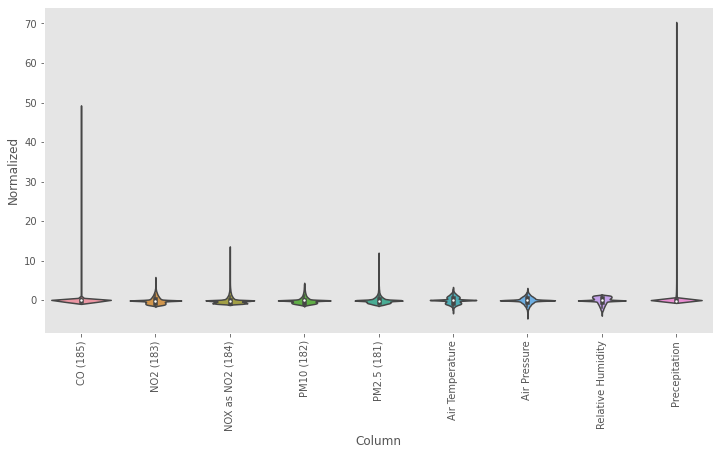

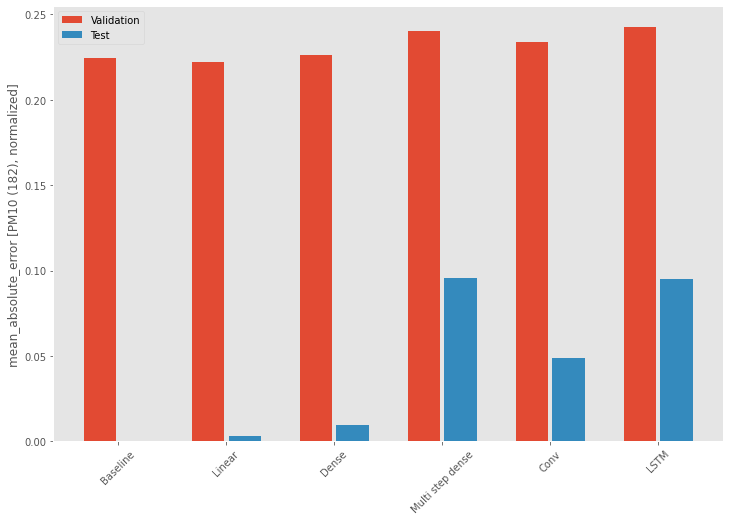

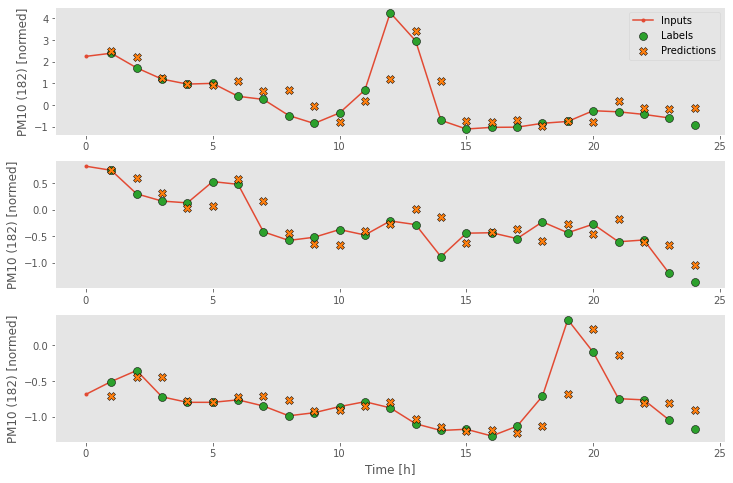

In [196]:
models(df_knn)